# ELEC/COMP 576: Introduction to Deep Learning
## Final project

## author: 
## netid: 

## Part 0 Create target model

In [1]:
from cifar10_target_model import run_experiment

# Create target CNN model
# TODO: any pretrained model to substitute this target model
run_experiment(save_model=True)

170500096/170498071 [==============================] - 2s 0us/step
Epoch 1/50
196/196 [==============================] - 5s 23ms/step - loss: 1.9472 - accuracy: 0.2800 - val_loss: 1.5065 - val_accuracy: 0.4490
Epoch 2/50
196/196 [==============================] - 4s 21ms/step - loss: 1.4637 - accuracy: 0.4675 - val_loss: 1.2660 - val_accuracy: 0.5402
Epoch 3/50
196/196 [==============================] - 4s 21ms/step - loss: 1.2493 - accuracy: 0.5522 - val_loss: 1.1164 - val_accuracy: 0.6026
Epoch 4/50
196/196 [==============================] - 4s 21ms/step - loss: 1.0848 - accuracy: 0.6138 - val_loss: 0.9914 - val_accuracy: 0.6503
Epoch 5/50
196/196 [==============================] - 4s 21ms/step - loss: 0.9713 - accuracy: 0.6575 - val_loss: 0.8988 - val_accuracy: 0.6779
Epoch 6/50
196/196 [==============================] - 4s 21ms/step - loss: 0.8902 - accuracy: 0.6856 - val_loss: 0.8075 - val_accuracy: 0.7195
Epoch 7/50
196/196 [==============================] - 4s 21ms/step - loss: 

## Part 0.5 Show data

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


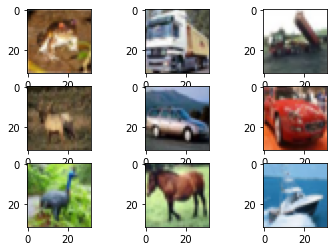

In [ ]:
# Ref: https://machinelearningmastery.com/how-to-load-and-visualize-standard-computer-vision-datasets-with-keras/
# example of loading the cifar10 dataset
from matplotlib import pyplot
from tensorflow.keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

## Part 1 Evaluation on black box, using Data Generator

In [2]:
from cifar10_substitue_model import run_experiment

# Create experiment model using datagen's method; save the model
run_experiment(lamda=0.1, aug_func='datagen', save_model=True)

(Test) Summarize each class' distribution {0: 815, 1: 802, 2: 788, 3: 809, 4: 825, 5: 789, 6: 793, 7: 799, 8: 789, 9: 791}
(Train) Summarize each class' distribution {0: 185, 1: 198, 2: 212, 3: 191, 4: 175, 5: 211, 6: 207, 7: 201, 8: 211, 9: 209}
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
8/7 [==============================] - 1s 162ms/step - loss: 2.2964 - accuracy: 0.1190 - val_loss: 2.2744 - val_accuracy: 0.1670
Epoch 2/50
8/7 [==============================] - 1s 137ms/step - loss: 2.2482 - accuracy: 0.1915 - val_loss: 2.2028 - val_accuracy: 0.2060
Epoch 3/50
8/7 [==============================] - 1s 140ms/step - loss: 2.1361 - accuracy: 0.2360 - val_loss: 2.1054 - val_accuracy: 0.2135
Epoch 4/50
8/7 [==============================] - 1s 139ms/step - loss: 2.0551 - accuracy: 0.2570 - val_loss: 2.0311 - val_accuracy: 0.2484
Epoch 5/50
8/7 [==============================] - 1s 137ms/step - loss: 1.9983 - accuracy: 0.2635 - val_loss: 1.9844 

Get substitute model from saved_models/cifar10_substitute_model/datagen
Accuracy of Substitute model on regular images: [1.3581181764602661, 0.5199000239372253]
Accuracy of Target model on regular images: [0.7183531522750854, 0.8158000111579895]
Accuracy of Substitute model on adversarial images: [3.9814939498901367, 0.03700000047683716]
Accuracy of Target model on adversarial images: [2.009192943572998, 0.5690000057220459]


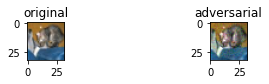

The original image is classified as cat
The adversarial image is classified as dog


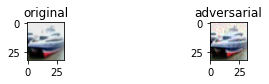

The original image is classified as ship
The adversarial image is classified as automobile


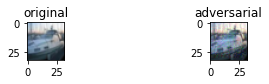

The original image is classified as ship
The adversarial image is classified as automobile


/content/cifar10_attack.py:102: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(base, 2, 2 * (base - miscount) + 1)
/content/cifar10_attack.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(base, 2, 2 * (base - miscount) + 2)


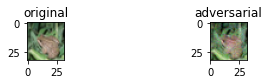

The original image is classified as frog
The adversarial image is classified as deer


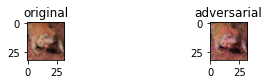

The original image is classified as frog
The adversarial image is classified as truck


In [4]:
from cifar10_attack import run_experiment

# Run experiment using datagen heuristic
run_experiment(substitute_model_loc='saved_models/cifar10_substitute_model/datagen', plot=True, epslion=0.05)

## Part 2 Evaluation on black box, using Jacobian heuristic

In [ ]:
from cifar10_substitue_model import run_experiment

# Create experiment model using jacobian-alpha method; save the model
# TODO: increase epochs?
run_experiment(aug_func='jacobian-alpha', save_model=True, epochs=2)

(Test) Summarize each class' distribution {0: 970, 1: 939, 2: 943, 3: 950, 4: 958, 5: 952, 6: 952, 7: 948, 8: 950, 9: 938}
(Train) Summarize each class' distribution {0: 30, 1: 61, 2: 57, 3: 50, 4: 42, 5: 48, 6: 48, 7: 52, 8: 50, 9: 62}
Train substitute network round 0 / 2 ...
Epoch 1/10
2/2 [==============================] - 2s 813ms/step - loss: 2.2828 - accuracy: 0.1240 - val_loss: 2.3320 - val_accuracy: 0.1108
Epoch 2/10
2/2 [==============================] - 1s 746ms/step - loss: 2.2481 - accuracy: 0.1440 - val_loss: 2.3645 - val_accuracy: 0.1006
Epoch 3/10
2/2 [==============================] - 2s 958ms/step - loss: 2.2316 - accuracy: 0.1520 - val_loss: 2.3248 - val_accuracy: 0.1059
Epoch 4/10
2/2 [==============================] - 2s 817ms/step - loss: 2.2047 - accuracy: 0.1800 - val_loss: 2.2969 - val_accuracy: 0.1222
Epoch 5/10
2/2 [==============================] - 2s 992ms/step - loss: 2.1732 - accuracy: 0.2200 - val_loss: 2.2712 - val_accuracy: 0.1349
Epoch 6/10
2/2 [======

Get substitute model from saved_models/cifar10_substitute_model/jacobian-alpha
Accuracy of Substitute model on regular images: [2.0692131519317627, 0.37380000948905945]
Accuracy of Target model on regular images: [0.8596482276916504, 0.7139999866485596]
Accuracy of Substitute model on adversarial images: [5.782158374786377, 0.017999999225139618]
Accuracy of Target model on adversarial images: [1.4097144603729248, 0.546999990940094]


/root/cifar10_attack.py:99: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(base, 2, 2 * (base - miscount) + 1)
/root/cifar10_attack.py:103: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(base, 2, 2 * (base - miscount) + 2)


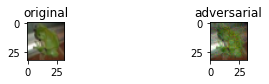

The original image is classified as frog
The adversarial image is classified as bird


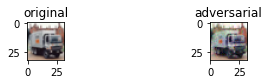

The original image is classified as truck
The adversarial image is classified as automobile


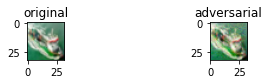

The original image is classified as ship
The adversarial image is classified as frog


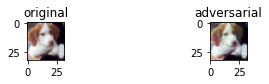

The original image is classified as dog
The adversarial image is classified as cat


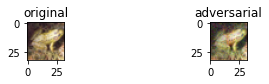

The original image is classified as frog
The adversarial image is classified as deer


In [ ]:
from cifar10_attack import run_experiment

# Run experiment using jacobian-alpha heuristic
run_experiment(substitute_model_loc='saved_models/cifar10_substitute_model/jacobian-alpha', plot=True, epslion=0.05)

## Part 3 Evaluation on black box, using jacobian-beta heuristic

In [ ]:
from cifar10_substitue_model import run_experiment

# Create experiment model using jacobian-beta method; save the model
# TODO: increase epochs?
run_experiment(lamda=0.1, aug_func='jacobian-beta', save_model=True, epochs=2)

Train substitute network round 0 / 2 ...
Epoch 1/10
2/2 [==============================] - 2s 786ms/step - loss: 2.3106 - accuracy: 0.1060 - val_loss: 2.3100 - val_accuracy: 0.0982
Epoch 2/10
2/2 [==============================] - 1s 703ms/step - loss: 2.2690 - accuracy: 0.1360 - val_loss: 2.3225 - val_accuracy: 0.1268
Epoch 3/10
2/2 [==============================] - 2s 761ms/step - loss: 2.2502 - accuracy: 0.1780 - val_loss: 2.3282 - val_accuracy: 0.1017
Epoch 4/10
2/2 [==============================] - 2s 806ms/step - loss: 2.2399 - accuracy: 0.1460 - val_loss: 2.3295 - val_accuracy: 0.1035
Epoch 5/10
2/2 [==============================] - 2s 869ms/step - loss: 2.2189 - accuracy: 0.1400 - val_loss: 2.2994 - val_accuracy: 0.1282
Epoch 6/10
2/2 [==============================] - 2s 1s/step - loss: 2.1945 - accuracy: 0.1780 - val_loss: 2.2756 - val_accuracy: 0.1502
Epoch 7/10
2/2 [==============================] - 2s 881ms/step - loss: 2.1646 - accuracy: 0.2200 - val_loss: 2.2463 - val

Get substitute model from saved_models/cifar10_substitute_model/jacobian-beta
Accuracy of Substitute model on regular images: [2.0676634311676025, 0.39629998803138733]
Accuracy of Target model on regular images: [0.8596482276916504, 0.7139999866485596]
Accuracy of Substitute model on adversarial images: [6.28594446182251, 0.013000000268220901]
Accuracy of Target model on adversarial images: [1.4643023014068604, 0.5350000262260437]


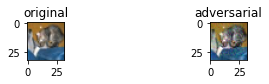

The original image is classified as cat
The adversarial image is classified as automobile


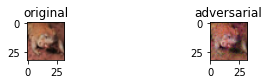

The original image is classified as frog
The adversarial image is classified as truck


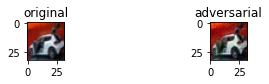

The original image is classified as automobile
The adversarial image is classified as truck


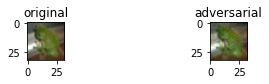

The original image is classified as frog
The adversarial image is classified as bird


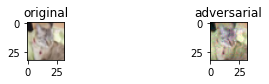

The original image is classified as cat
The adversarial image is classified as horse


In [ ]:
from cifar10_attack import run_experiment

# Run experiment using jacobian-beta heuristic
run_experiment(substitute_model_loc='saved_models/cifar10_substitute_model/jacobian-beta', plot=True, epslion=0.05)